In [6]:
import random
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list


In [1]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self, root):
        y = self.left
        self.left = y.right
        if y.right is not None:
            y.right.parent = self
        y.parent = self.parent
        if self.parent is None:
            root = y
        elif self.is_right_child():
            self.parent.right = y
        else:
            self.parent.left = y
        y.right = self
        self.parent = y

        return root

    def rotate_left(self, root):
        y = self.right
        self.right = y.left
        if y.left is not None:
            y.left.parent = self
        y.parent = self.parent
        if self.parent is None:
            root = y
        elif self.is_left_child():
            self.parent.left = y
        else:
            self.parent.right = y
        y.left = self
        self.parent = y

        return root
    

In [2]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))
    
    
    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)
    
    def fix(self, node):
        parent = node.parent 
        if parent is None or parent.is_black():
            return     
        grandparent = parent.parent
        
        if grandparent is None:
            parent.make_black()
            return

        uncle = node.get_uncle()
        
        if uncle is not None and uncle.is_red():
            parent.make_black()
            grandparent.make_red()
            uncle.make_black()
            self.fix(grandparent)

        elif grandparent.left == parent:
            if parent.right == node:
                self.root = parent.rotate_left(self.root)
                parent = node

            self.root = grandparent.rotate_right(self.root)
            
            parent.make_black()
            grandparent.make_red()
        else:
            if parent.left == node:
                self.root = parent.rotate_right(self.root)
                parent = node
            
            self.root = grandparent.rotate_left(self.root)
            
            parent.make_black()
            grandparent.make_red()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


In [ ]:
a = [4,23,7,10]
b = RBTree()
for i in a:
    print(i)
    b.insert(i)
    print(b,'\n')

print(b)

print('\n')
print(b.get_height())

In [3]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None

    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        else:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)

    def height(self):
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        if node is None:
            return 0
        else:
            left_height = self._height_recursive(node.left)
            right_height = self._height_recursive(node.right)
            return max(left_height, right_height) + 1
        
    def print_tree(self):
        self._print_tree_recursive(self.root)

    def _print_tree_recursive(self, node):
        if node is not None:
            self._print_tree_recursive(node.left)
            print(node.value)
            self._print_tree_recursive(node.right)
    

In [7]:
r = [4,23,7,10,29]
p = sorted(r)
print(p)
q = BST()
for i in p:
    #print(i)
    q.insert(i)

print(q.height())



[4, 7, 10, 23, 29]
5


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def draw_plot(bst_height, rbt_height):
    # Define the width of the bars
    bar_width = 0.55

    # Set the positions of the bars on the x-axis
    plt.figure(figsize=(18, 10))

    labels = [i for i in range(1,101)]
    x = np.arange(len(labels))
    # Plotting the bars for the first set of values
    plt.bar(x , bst_height, width=bar_width, label='BST')

    # Plotting the bars for the second set of values
    plt.bar(x, rbt_height, width=bar_width, label='RBT')

    # Adding labels, title, and legend
    plt.xlabel('Iterations')
    plt.ylabel('Height')
    plt.title('Height of Red Black Trees vs. Binary Search Trees')
    plt.xticks(x[::2], labels[::2])
    plt.legend()

    # Show plot
    plt.show()

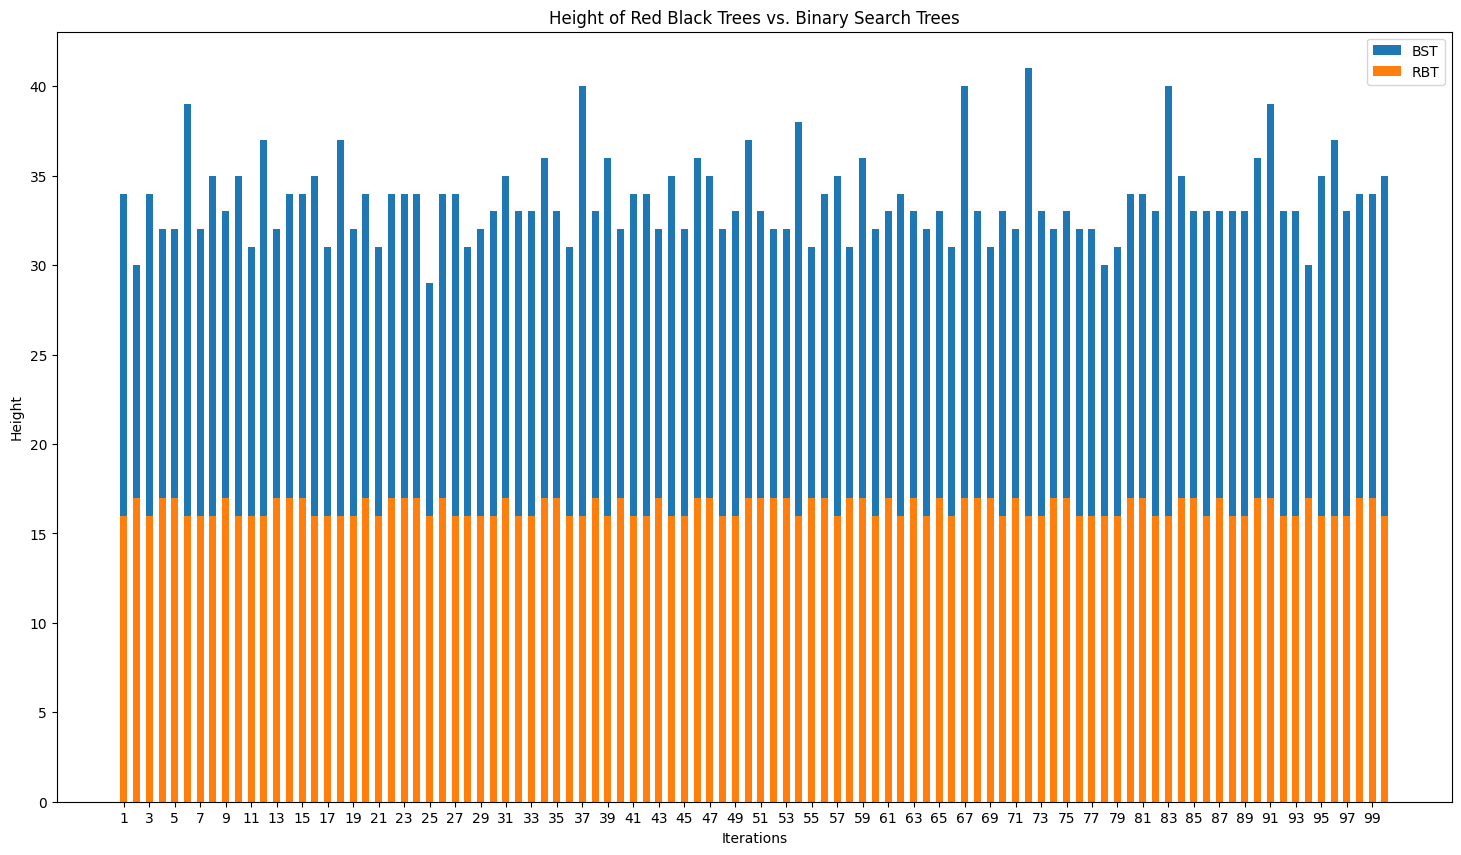

In [22]:
runs = 100
bst_height = []
rbt_height = []
height_difference = []

for _ in range(runs):
    list = create_custom_list(10000, 2000)
    bst = BST()
    rbt = RBTree()
    for value in list:
        bst.insert(value)
        rbt.insert(value)
    bst_height.append(bst.height())
    rbt_height.append(rbt.get_height())
    height_difference.append(rbt.get_height()-bst.height())

draw_plot(bst_height, rbt_height)

    

In [17]:
a = create_custom_list(10000, 2000)
b = sorted(a)
bst = BST()
for value in a:
    bst.insert(value)

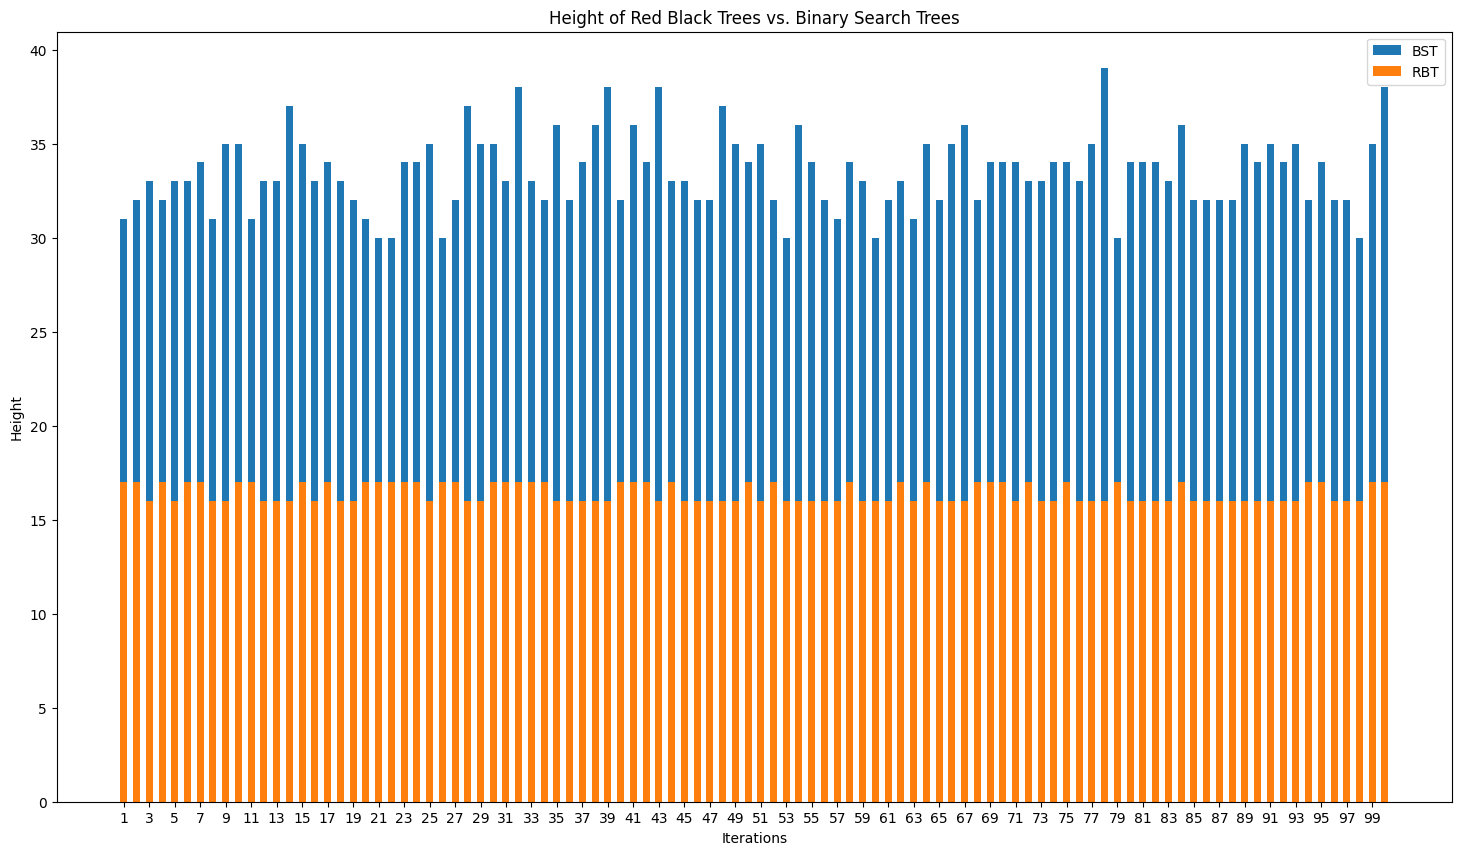

In [25]:
runs = 100
bst_height = []
rbt_height = []
height_difference = []

for _ in range(runs):
    a = create_custom_list(10000, 2000)
    b = sorted(a)
    bst = BST()
    rbt = RBTree()
    for value in a:
        bst.insert(value)
        rbt.insert(value)
    bst_height.append(bst.height())
    rbt_height.append(rbt.get_height())
    height_difference.append(rbt.get_height()-bst.height())

draw_plot(bst_height, rbt_height)



In [29]:
import random

def create_list_with_sortedness(lst, size, sortedness):
    
    # Calculate the number of swaps based on sortedness percentage
    num_swaps = int(size * sortedness)
    
    # Perform controlled swaps to introduce sortedness variation
    for _ in range(num_swaps):
        i, j = random.sample(range(size), 2)
        lst[i], lst[j] = lst[j], lst[i]
    
    return lst



In [26]:
def height_difference(bst_heights, rbt_heights):
    return [bst_height - rbt_height for bst_height, rbt_height in zip(bst_heights, rbt_heights)]

In [31]:
runs = 100
sortedness = [0.4,0.6,0.8]
b_40 = []
b_60 =[]
b_80 = []
r_40 = []
r_60 =[]
r_80 = []
for _ in range(runs):
    bst_40 = BST(); bst_60 = BST(); bst_80 = BST()
    rbt_40 = RBTree(); rbt_60 = RBTree(); rbt_80 = RBTree()
    l = create_custom_list(10000, 2000) 
    p = sorted(l)

    sl_40 = create_list_with_sortedness(l, 10000, 0.4)
    for value in sl_40:
        bst_40.insert(value)
        rbt_40.insert(value)
    b_40.append(bst_40.height())
    r_40.append(rbt_40.get_height())

    sl_60 = create_list_with_sortedness(l, 10000, 0.6)
    for value in sl_60:
        bst_60.insert(value)
        rbt_60.insert(value)
    b_60.append(bst_60.height())
    r_60.append(rbt_60.get_height())

    sl_80 = create_list_with_sortedness(l, 10000, 0.8)
    for value in sl_80:
        bst_80.insert(value)
        rbt_80.insert(value)
    b_80.append(bst_80.height())
    r_80.append(rbt_80.get_height())

diff_40 = height_difference(b_40, r_40)
diff_60 = height_difference(b_60, r_60)
diff_80 = height_difference(b_80, r_80)








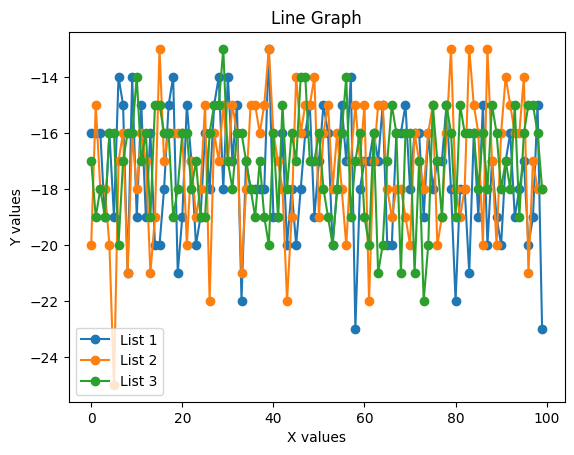

In [32]:
runs = [i for i in range(100)]
# Plotting the lines
plt.plot(runs, diff_40, label='List 1', marker='o')
plt.plot(runs, diff_60, label='List 2', marker='o')
plt.plot(runs, diff_80, label='List 3', marker='o')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Line Graph')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()